In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv('flight_16954.csv', decimal=',')

In [8]:
df.shape

(1001, 19)

In [5]:

df.head()

,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
0,-4.99848985672,4.604985,7.741628,-4.5614915,0.0,0.0,0.0,2.1253626,0.1618398,-9.445829,0.0071009086,0.21632473,2.7409492,0.0004307203,-0.0021206727,0.0017309283,0.32628158,0.60109526,0.79331857
1,-4.97847986221,4.604985,7.741628,-4.5614915,0.0,0.0,0.0,1.8044189,0.09020696,-9.624179,0.0071049216,0.21634871,2.74095,0.0024402454,0.00013546286,0.0009043736,0.32628158,0.60109526,0.79331857
2,-4.95849990845,4.6069927,7.7405605,-4.565799,0.0,0.0,0.0,2.3542745,-0.059743017,-9.535318,0.0071062646,0.21633488,2.7409503,0.007017534,0.0035631263,0.00035331017,0.32629544,0.6011063,0.79336226
3,-4.9385099411,4.6069927,7.7405605,-4.565799,0.0,0.0,0.0,2.086475,-0.09314072,-9.464511,0.0070946505,0.21630865,2.7409477,0.014188289,-0.0049666762,0.0019667533,0.32629544,0.6011063,0.79336226
4,-4.91850996017,4.6049247,7.7404213,-4.5635676,0.0,0.0,0.0,1.7994175,-0.31154993,-9.692139,0.0070776823,0.21634066,2.7409441,0.0057332087,0.0021695935,0.001274337,0.3263105,0.6011174,0.793406


In [7]:
df.describe()


,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
count,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
unique,1001,870,870,870,782,783,783,1001,1001,1001,1001,996,846,1001,1001,1001,729,729,732
top,12.0163800716,4.610704,7.7401047,-4.5509453,0.0,0.0,0.0,-1.6955311,-0.18089856,-8.638461,0.007075431,0.2163034,2.7409475,-0.23300721,-0.15345822,0.054139256,0.3217034,0.592017,0.7808322
freq,1,3,3,3,219,219,219,1,1,1,1,3,11,1,1,1,3,3,3


In [9]:
import glob, os    
dp = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "flight_*.csv"))), axis= 1)

Mergerd all the datasets of every drone with respect to the columns

In [10]:
dp

,seconds_since_launch,position_ned_m[0],position_ned_m[1],position_ned_m[2],velocity_ned_mps[0],velocity_ned_mps[1],velocity_ned_mps[2],accel_body_mps2[0],accel_body_mps2[1],accel_body_mps2[2],...,accel_body_mps2[2],orientation_rad[0],orientation_rad[1],orientation_rad[2],angular_rate_body_radps[0],angular_rate_body_radps[1],angular_rate_body_radps[2],position_sigma_ned_m[0],position_sigma_ned_m[1],position_sigma_ned_m[2]
0,-4.99846,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.200169,-0.059350,-9.497843,...,-9.650308,0.008489,0.217408,2.741256,0.007303,-0.000090,-0.000024,0.213675,0.347447,0.574463
1,-4.97846,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.027999,-0.053380,-9.611131,...,-9.652624,0.008488,0.217407,2.741255,0.005523,-0.000140,-0.000220,0.213768,0.347553,0.574729
2,-4.95833,5.143372,8.170100,-4.561916,0.000000,0.000000,0.000000,2.051773,-0.264372,-9.632382,...,-9.608853,0.008487,0.217411,2.741255,0.002158,-0.000413,-0.000270,0.213768,0.347553,0.574729
3,-4.93848,5.143549,8.168812,-4.561501,0.000000,0.000000,0.000000,2.173164,-0.113283,-9.657514,...,-9.604335,0.008485,0.217410,2.741255,0.001949,0.001000,0.000329,0.213787,0.347575,0.574785
4,-4.91848,5.143549,8.168812,-4.561501,0.000000,0.000000,0.000000,2.012778,-0.045159,-9.635982,...,-9.572981,0.008482,0.217412,2.741254,-0.000164,0.000607,-0.000111,0.213787,0.347575,0.574785
5,-4.89849,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,2.077366,-0.070073,-9.526079,...,-9.555756,0.008482,0.217408,2.741254,-0.003897,-0.000166,-0.000106,0.213787,0.347575,0.574785
6,-4.87850,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,2.168130,-0.001093,-9.594013,...,-9.564803,0.008480,0.217405,2.741254,-0.005914,-0.000109,0.000253,0.213805,0.347597,0.574839
7,-4.85848,5.143012,8.170419,-4.563326,0.000000,0.000000,0.000000,1.938173,-0.068898,-9.672871,...,-9.566397,0.008479,0.217403,2.741253,-0.007626,-0.000082,0.000278,0.213805,0.347597,0.574839
8,-4.83851,5.143236,8.170900,-4.565207,0.000000,0.000000,0.000000,2.158677,-0.156225,-9.559793,...,-9.559799,0.008483,0.217403,2.741254,-0.006761,-0.000783,0.000293,0.213822,0.347618,0.574892
9,-4.81852,5.143236,8.170900,-4.565207,0.000000,0.000000,0.000000,2.115438,-0.032763,-9.527992,...,-9.619718,0.008489,0.217400,2.741256,-0.005292,-0.000382,0.000638,0.213822,0.347618,0.574892


In [11]:
velocity_0=dp.filter(like='velocity_ned_mps[0]') 

Filtered out all the columns of velocity of zip in north for each drone's dataset which is presented by 0

In [12]:
velocity_0

,velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],...,velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0],velocity_ned_mps[0]
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [13]:
velocity_0.isnull().sum()

velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]    10
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     5
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     1
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
                       ..
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned_mps[0]     0
velocity_ned

In [14]:
total = velocity_0.isnull().sum()[velocity_0.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
velocity_ned_mps[0],56,5.59
velocity_ned_mps[0],19,1.90
velocity_ned_mps[0],16,1.60
velocity_ned_mps[0],14,1.40
velocity_ned_mps[0],14,1.40
velocity_ned_mps[0],10,1.00
velocity_ned_mps[0],9,0.90
velocity_ned_mps[0],5,0.50
velocity_ned_mps[0],5,0.50
velocity_ned_mps[0],4,0.40


In [15]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(velocity_0)
vel_0= imp.transform(velocity_0)

C:\Users\tanma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Filled the missing cells with the median values of respective columns

In [16]:
np.any(np.isnan(vel_0))


False

In [17]:
vel_0.dtype

dtype('float64')

In [18]:
dataset = pd.DataFrame(vel_0)

In [19]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [20]:
w = dataset.iloc[:, 0:447]

In [21]:
from sklearn.preprocessing import StandardScaler
std_vel0 = StandardScaler().fit_transform(w)

Standardized the data

In [22]:
std_vel0

array([[ 1.85079217,  1.83972774,  1.84103982, ...,  1.84433869,
         1.84457944,  1.83809693],
       [ 1.85079217,  1.83972774,  1.84103982, ...,  1.84433869,
         1.84457944,  1.83809693],
       [ 1.85079217,  1.83972774,  1.84103982, ...,  1.84433869,
         1.84457944,  1.83809693],
       ...,
       [-0.37943979, -0.42213079, -0.31157478, ..., -0.43112833,
        -0.42597131, -0.52955357],
       [-0.38037409, -0.42314659, -0.31002087, ..., -0.43053812,
        -0.42551303, -0.52955357],
       [-0.38148728, -0.42394786, -0.3092239 , ..., -0.42972117,
        -0.42496199, -0.52955357]])

In [23]:
np.any(np.isnan(std_vel0))

False

In [24]:
dataset



,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [25]:
v0= dataset.mean()

Calculated the mean of every column

In [26]:
v0

0     -19.823167
1     -20.289993
2     -19.450546
3     -19.013635
4     -19.431202
5     -20.083436
6     -19.817682
7     -19.212375
8     -20.498185
9     -20.041676
10    -19.450692
11    -22.810176
12    -21.763385
13    -22.368039
14    -20.723682
15    -20.786511
16    -22.006586
17    -22.748938
18    -19.911080
19    -19.725420
20    -19.752059
21    -19.866613
22    -19.895881
23    -20.072672
24    -20.402517
25    -20.315217
26    -19.920360
27    -20.678112
28    -19.861836
29    -19.605922
         ...    
417   -19.984483
418   -19.858752
419   -20.673714
420   -20.245906
421   -19.810302
422   -20.174870
423   -21.213600
424   -20.505977
425   -20.651251
426   -20.549667
427   -20.245306
428   -20.535977
429   -20.626736
430   -20.548782
431   -19.938185
432   -19.740269
433   -20.382895
434   -19.866823
435   -20.411627
436   -20.312424
437   -20.023524
438   -20.247108
439   -19.458526
440   -19.882766
441   -19.850614
442   -20.086137
443   -19.775642
444   -19.9616

In [27]:
df2 = pd.read_csv('flight_16954.csv', decimal=',')

In [28]:
import glob, os    
dp = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "flight_*.csv"))), axis= 1)

In [29]:
velocity_1=dp.filter(like='velocity_ned_mps[1]') 

Same procedure is repeated with the columns for  velocity of zip in east direction which is denoted by 1

In [30]:
velocity_1.isnull().sum()

velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]    10
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     5
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     1
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
                       ..
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned_mps[1]     0
velocity_ned

In [31]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(velocity_1)
vel_1= imp.transform(velocity_1)

C:\Users\tanma\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
dataset_10 = pd.DataFrame(vel_1)

In [33]:
dataset_10

,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [34]:
v1= dataset_10.mean()

Mean of every column is calculated 

In [35]:
v1

0       8.419304
1       8.378106
2       7.980690
3       7.682546
4       8.044063
5       8.508921
6       8.325022
7       8.125312
8       8.801406
9       8.244977
10      8.263440
11     10.519235
12      9.607449
13     10.253205
14      8.967330
15      8.769472
16     10.183846
17     10.621589
18      8.399747
19      8.361273
20      8.148123
21      8.150120
22      8.406031
23      8.387090
24      8.638019
25      8.538727
26      8.460027
27      8.744934
28      8.070860
29      8.105188
         ...    
417     8.387239
418     8.110106
419     8.956492
420     8.442808
421     8.420881
422     8.650680
423     8.790880
424     8.508468
425     8.514414
426     8.762319
427     8.601229
428     8.883706
429     8.689329
430     8.406981
431     8.228811
432     8.194465
433     8.467717
434     8.292201
435     8.437939
436     8.647462
437     8.503095
438     8.500629
439     8.104702
440     8.326751
441     8.261157
442     8.371263
443     8.217332
444     8.1347

In [36]:
v1.dtype

dtype('float64')

In [37]:
frames=[v0, v1]

In [38]:
velocity= pd.concat(frames, axis= 1)

Both the datasets for calculated mean values of velocity of zip in north(0) and east(1) direction for every drone case is merged

In [39]:
velocity

,0,1
0,-19.823167,8.419304
1,-20.289993,8.378106
2,-19.450546,7.980690
3,-19.013635,7.682546
4,-19.431202,8.044063
5,-20.083436,8.508921
6,-19.817682,8.325022
7,-19.212375,8.125312
8,-20.498185,8.801406
9,-20.041676,8.244977


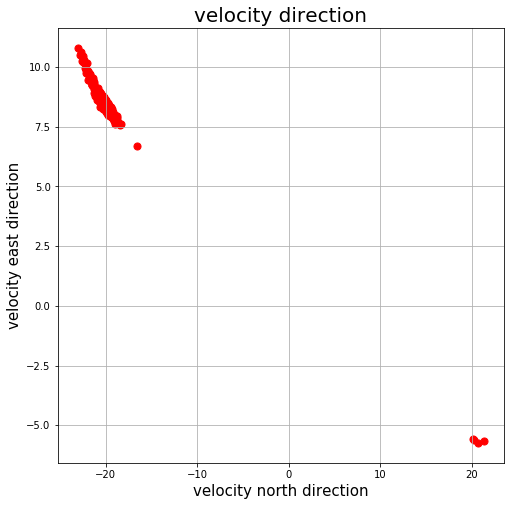

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('velocity north direction', fontsize = 15)
ax.set_ylabel('velocity east direction', fontsize = 15)
ax.set_title('velocity direction', fontsize = 20)
ax.scatter(velocity[0]
               , velocity[1]
               , c = 'red'
               , s = 50)

ax.grid()

velocity north direction(1): It is the representation of mean velocity of each drone in the north direction
velocity east direction(0): It is the representation of mean velocity of each drone in the east direction

From this graph we can infer that there are more drones who were observed to have more velocity in the east direction than in the north. Maybe more of the drones deliver the products in the east direction or the wind can also have a effect on the velocity.
Moreover, the magnitude of the velocity in north direction is more than of east.


In [41]:
dd = pd.read_csv('summary_data.csv', decimal=',')

In [42]:
dd.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.55,15SPJJJ09036021,577350132807348254,5c504d9a16,32.45344543457031,30.16465563418132,2018-09-06 07:43:59 CAT,NaN,74.15,80662.08173600446,-49.434555326781336,1.9493382008069269,15SPJJJ11024054
1,16952,20.5,15SPJJJ10029029,577209618523054122,5c504d9a16,32.14120864868164,30.535246125202182,2018-09-06 07:51:49 CAT,NaN,71.17504354808256,80708.0653138726,-4.408768056968672,0.9173566281362604,15SPJJJ09011032
2,16954,24.475018567717616,15SPJJJ10012034,577209618523054122,5c504d9a16,34.70187759399414,29.872613305438353,2018-09-06 09:56:37 CAT,NaN,66.3749815166739,80774.27043832066,-23.458781321837478,3.7883831136778654,15SPJJJ09011032
3,16955,27.3,15SPJJJ10054027,577209618523082792,5c504d9a16,34.36899948120117,29.877623757911977,2018-09-06 10:27:04 CAT,NaN,59.0,80805.13879284788,-46.747880779483005,3.9216052358162576,15SPJJJ11049056
4,16957,26.950000000000003,15SPJJJ10050049,577348835962150933,5c504d9a16,32.89897918701172,30.027183471848588,2018-09-06 11:09:39 CAT,NaN,63.900000000000006,80768.96930652791,-29.29336009854321,2.9758808648134054,15SPJJJ09031032


In [43]:
wind= dd.iloc[:,11:12]

Filtered out the wind_direction column from summary table

In [44]:
wind

,wind_direction
0,-49.434555326781336
1,-4.408768056968672
2,-23.458781321837478
3,-46.747880779483005
4,-29.29336009854321
5,-68.36083811675873
6,-27.822443333696082
7,7.094332685096083
8,-46.053006467168174
9,-17.59464003488049


In [45]:
frames_1=[v0, v1, wind]

In [46]:
velocity_wind_dir= pd.concat(frames_1, axis= 1)

In [47]:
velocity_wind_dir

,0,1,wind_direction
0,-19.823167,8.419304,-49.434555326781336
1,-20.289993,8.378106,-4.408768056968672
2,-19.450546,7.980690,-23.458781321837478
3,-19.013635,7.682546,-46.747880779483005
4,-19.431202,8.044063,-29.29336009854321
5,-20.083436,8.508921,-68.36083811675873
6,-19.817682,8.325022,-27.822443333696082
7,-19.212375,8.125312,7.094332685096083
8,-20.498185,8.801406,-46.053006467168174
9,-20.041676,8.244977,-17.59464003488049


In [48]:
velocity_wind_dir.columns.values[0] = "velocity in north"
velocity_wind_dir.columns.values[1] = "velocity in east"

Merged the velocity dataset and the filtered dataset of wind direction from summary

In [49]:
velocity_wind_dir

,velocity in north,velocity in east,wind_direction
0,-19.823167,8.419304,-49.434555326781336
1,-20.289993,8.378106,-4.408768056968672
2,-19.450546,7.980690,-23.458781321837478
3,-19.013635,7.682546,-46.747880779483005
4,-19.431202,8.044063,-29.29336009854321
5,-20.083436,8.508921,-68.36083811675873
6,-19.817682,8.325022,-27.822443333696082
7,-19.212375,8.125312,7.094332685096083
8,-20.498185,8.801406,-46.053006467168174
9,-20.041676,8.244977,-17.59464003488049


In [50]:
velocity_wind_dir.dtypes

velocity in north    float64
velocity in east     float64
wind_direction        object
dtype: object

In [51]:
velocity_wind_dir['wind_direction'] = velocity_wind_dir.wind_direction.str.replace(r'\s+','').astype(float)
print(velocity_wind_dir)

     velocity in north  velocity in east  wind_direction
0           -19.823167          8.419304      -49.434555
1           -20.289993          8.378106       -4.408768
2           -19.450546          7.980690      -23.458781
3           -19.013635          7.682546      -46.747881
4           -19.431202          8.044063      -29.293360
5           -20.083436          8.508921      -68.360838
6           -19.817682          8.325022      -27.822443
7           -19.212375          8.125312        7.094333
8           -20.498185          8.801406      -46.053006
9           -20.041676          8.244977      -17.594640
10          -19.450692          8.263440       -6.229944
11          -22.810176         10.519235      173.524053
12          -21.763385          9.607449      177.288807
13          -22.368039         10.253205      157.407334
14          -20.723682          8.967330      158.021111
15          -20.786511          8.769472      -38.575222
16          -22.006586         

#Converted data type of wind_direction from object to float

In [52]:
velocity_wind_dir.dtypes

velocity in north    float64
velocity in east     float64
wind_direction       float64
dtype: object

In [53]:
z =velocity_wind_dir.iloc[:, 0:3]
from sklearn.preprocessing import StandardScaler
std_velocity_wind_dir = StandardScaler().fit_transform(z)

In [54]:
std_velocity_wind_dir = pd.DataFrame(std_velocity_wind_dir)

In [55]:
std_velocity_wind_dir

,0,1,2
0,0.006761,0.008291,-0.065279
1,-0.112561,-0.020686,0.644676
2,0.102005,-0.300206,0.344300
3,0.213680,-0.509903,-0.022916
4,0.106949,-0.255633,0.252302
5,-0.059764,0.071322,-0.363704
6,0.008164,-0.058022,0.275495
7,0.162882,-0.198487,0.826054
8,-0.165775,0.277039,-0.011960
9,-0.049090,-0.114321,0.436765


Standardized the data for the purposes of visualization.

In [56]:
import seaborn as sns

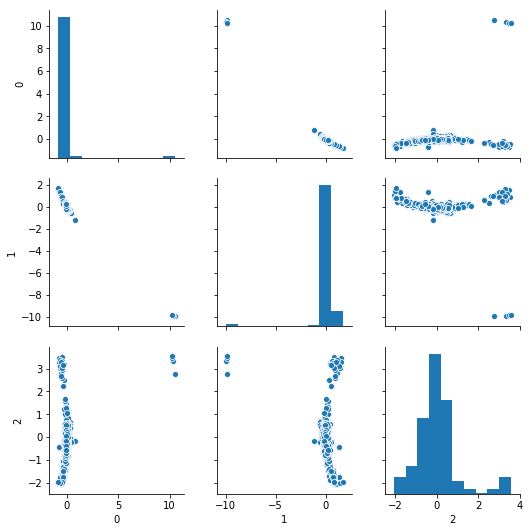

In [57]:
sns.pairplot(std_velocity_wind_dir)

0: Velocity of the zip in north direction
1: Velocity of the zip in east direction
2: Wind direction ( -0.5 to 1 : wind flowing in northeast direction
                     1.5 to 3 : wind flowing in the southwest direction whcih has an opposite effect on drone velocity)

We can infer that since the intensity of velocity in east direction is more( which was observed in the previous graph) the distribution is more varied and these drone are susceptible to winds from all directions especially northwest and west as the density increases towards this area.
There are a very few amount of drones which have velocity in north direction but experienced winds in south direction. Heance we can infer that wind negatively affects more drones which have velocity in north direction. Thus it is profitable to fly drones which increase the velocity in east direction as the wind does not negatively affect the flight.

In [88]:
dd

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,wind_direction,wind_magnitude
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,-49.434555326781336,1.9493382008069269,15SPJJJ11024054,-49.434555,1.949338
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,-4.408768056968672,0.9173566281362604,15SPJJJ09011032,-4.408768,0.917357
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,-23.458781321837478,3.7883831136778654,15SPJJJ09011032,-23.458781,3.788383
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,-46.747880779483005,3.9216052358162576,15SPJJJ11049056,-46.747881,3.921605
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,-29.29336009854321,2.9758808648134054,15SPJJJ09031032,-29.293360,2.975881
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,NaN,65.074951,80621.201026,-68.36083811675873,2.750346025295566,15SPJJJ11024054,-68.360838,2.750346
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,NaN,61.250000,80599.898970,-27.822443333696082,1.556340427316933,15SPJJJ09031032,-27.822443,1.556340
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,NaN,53.500000,80552.491259,7.094332685096083,2.378606979314085,15SPJJJ11049056,7.094333,2.378607
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,NaN,60.374982,80445.017877,-46.053006467168174,1.1619244598179594,15SPJJJ09011032,-46.053006,1.161924
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,NaN,49.600000,80379.646583,-17.59464003488049,2.742026903888676,15SPJJJ11049056,-17.594640,2.742027


In [89]:
total =dd.isnull().sum()[dd.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(dd)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
preflight_voltage,16,3.58


Calculating the missing values

In [90]:
dd.shape

(447, 16)

In [78]:
dd['air_temperature'] = dd.air_temperature.str.replace(r'\s+','').astype(float)
dd['preflight_voltage'] = dd.preflight_voltage.str.replace(r'\s+','').astype(float)
dd['wind_direction '] = dd.wind_direction .str.replace(r'\s+','').astype(float)
dd['wind_magnitude '] = dd.wind_magnitude .str.replace(r'\s+','').astype(float)
dd['launch_airspeed'] = dd.launch_airspeed.str.replace(r'\s+','').astype(float)
dd['launch_groundspeed'] = dd.launch_groundspeed .str.replace(r'\s+','').astype(float)
dd['rel_humidity'] = dd.rel_humidity.str.replace(r'\s+','').astype(float)
dd['static_pressure'] = dd.static_pressure.str.replace(r'\s+','').astype(float)

Converting most of the columns to float datatype to visualize the data which creates two extra columns of same parameters.

*The indexes and positions of columns keep changing, so in order to drop two extra columns in the following code we'll need to observe the column which has been repeated and then drop it*

In [93]:
dd.dtypes

flight_id                  int64
air_temperature          float64
battery_serial_number     object
body_serial_number         int64
commit                    object
launch_airspeed          float64
launch_groundspeed       float64
launch_timestamp          object
preflight_voltage        float64
rel_humidity             float64
static_pressure          float64
wind_direction            object
wind_magnitude            object
wing_serial_number        object
wind_direction           float64
wind_magnitude           float64
dtype: object

converting the datatypes to float for the sake of visualization

In [94]:
dd_update = dd.drop([dd.columns[11] , dd.columns[12]] ,  axis='columns')

In [95]:
dd_update

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wing_serial_number,wind_direction,wind_magnitude
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,15SPJJJ11024054,-49.434555,1.949338
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,15SPJJJ09011032,-4.408768,0.917357
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,15SPJJJ09011032,-23.458781,3.788383
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,15SPJJJ11049056,-46.747881,3.921605
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,15SPJJJ09031032,-29.293360,2.975881
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,NaN,65.074951,80621.201026,15SPJJJ11024054,-68.360838,2.750346
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,NaN,61.250000,80599.898970,15SPJJJ09031032,-27.822443,1.556340
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,NaN,53.500000,80552.491259,15SPJJJ11049056,7.094333,2.378607
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,NaN,60.374982,80445.017877,15SPJJJ09011032,-46.053006,1.161924
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,NaN,49.600000,80379.646583,15SPJJJ11049056,-17.594640,2.742027


In [96]:
dd_update.shape

(447, 14)

In [97]:
dd_new= dd_update.fillna(dd_update.mean())

As there were missing values in the preflight voltage data. It were filled by calculating the mean of the column. I selected mean instead of median because the range of the values was very minute thus mean would give a perfect representation of the missing values instead of median.

In [98]:
dd_new

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wing_serial_number,wind_direction,wind_magnitude
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,32.145665,74.150000,80662.081736,15SPJJJ11024054,-49.434555,1.949338
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,32.145665,71.175044,80708.065314,15SPJJJ09011032,-4.408768,0.917357
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,32.145665,66.374982,80774.270438,15SPJJJ09011032,-23.458781,3.788383
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,32.145665,59.000000,80805.138793,15SPJJJ11049056,-46.747881,3.921605
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,32.145665,63.900000,80768.969307,15SPJJJ09031032,-29.293360,2.975881
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07 CAT,32.145665,65.074951,80621.201026,15SPJJJ11024054,-68.360838,2.750346
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23 CAT,32.145665,61.250000,80599.898970,15SPJJJ09031032,-27.822443,1.556340
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51 CAT,32.145665,53.500000,80552.491259,15SPJJJ11049056,7.094333,2.378607
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05 CAT,32.145665,60.374982,80445.017877,15SPJJJ09011032,-46.053006,1.161924
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25 CAT,32.145665,49.600000,80379.646583,15SPJJJ11049056,-17.594640,2.742027


In [99]:
dd_update.dtypes

flight_id                  int64
air_temperature          float64
battery_serial_number     object
body_serial_number         int64
commit                    object
launch_airspeed          float64
launch_groundspeed       float64
launch_timestamp          object
preflight_voltage        float64
rel_humidity             float64
static_pressure          float64
wing_serial_number        object
wind_direction           float64
wind_magnitude           float64
dtype: object

In [100]:
dd_update.corr()

,flight_id,air_temperature,body_serial_number,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude
flight_id,1.000000,-0.040178,0.300896,0.124142,0.000139,0.056466,-0.212825,-0.104450,-0.009739,0.130860
air_temperature,-0.040178,1.000000,0.052604,0.406861,-0.348050,0.086064,-0.601721,-0.259201,-0.253747,0.167628
body_serial_number,0.300896,0.052604,1.000000,0.091054,-0.051289,0.054891,-0.109628,-0.049522,0.027995,0.015738
launch_airspeed,0.124142,0.406861,0.091054,1.000000,-0.387343,0.068374,-0.245074,0.118863,0.013256,0.560727
launch_groundspeed,0.000139,-0.348050,-0.051289,-0.387343,1.000000,-0.040875,0.076779,-0.105035,0.036895,-0.167412
preflight_voltage,0.056466,0.086064,0.054891,0.068374,-0.040875,1.000000,-0.162378,-0.156218,-0.073639,0.062221
rel_humidity,-0.212825,-0.601721,-0.109628,-0.245074,0.076779,-0.162378,1.000000,0.541878,0.274522,-0.262619
static_pressure,-0.104450,-0.259201,-0.049522,0.118863,-0.105035,-0.156218,0.541878,1.000000,0.172555,-0.071915
wind_direction,-0.009739,-0.253747,0.027995,0.013256,0.036895,-0.073639,0.274522,0.172555,1.000000,-0.111382
wind_magnitude,0.130860,0.167628,0.015738,0.560727,-0.167412,0.062221,-0.262619,-0.071915,-0.111382,1.000000


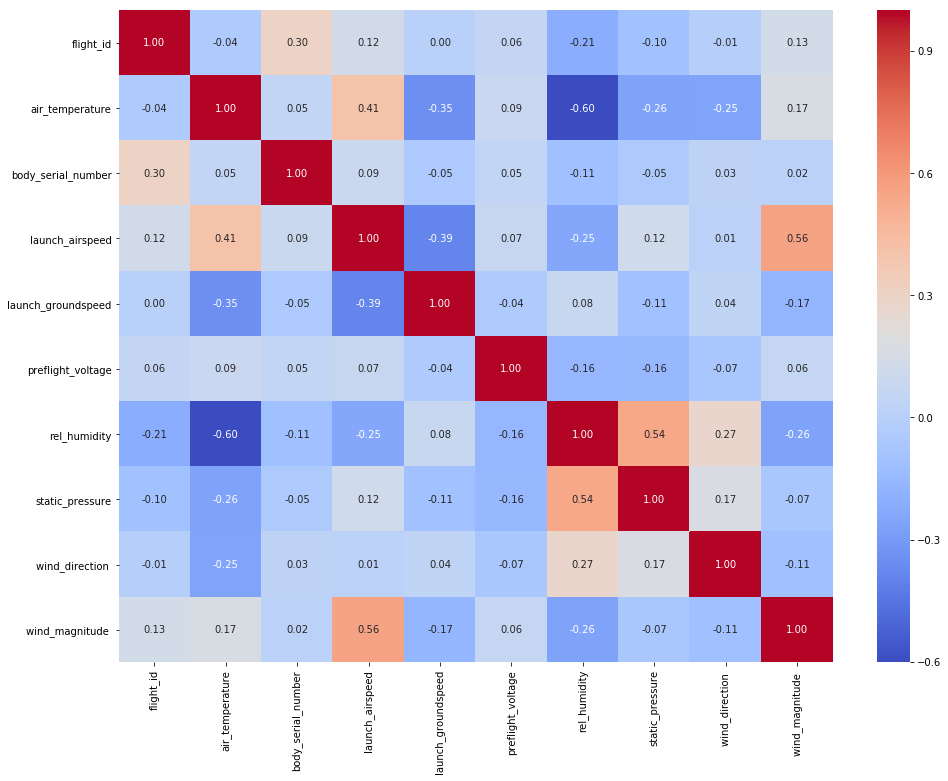

In [101]:
plt.figure(figsize=(16,12))
sns.heatmap(data=dd_update.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

We can observe that launch airspeed and wind magnitude are positively co-related.
humidity and air temperature are negatively co-related. This can give an idea about the seasonality.

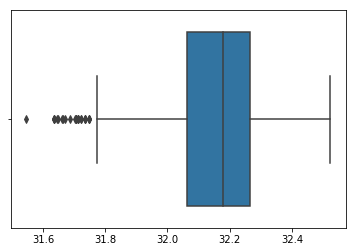

In [102]:
sns.boxplot(np.array(dd_new['preflight_voltage']))

Over here we need to find information on the variability or dispersion of the data. The boxplot gives us a good indication of how the values in the data are spread out. The boxplot is slightly skewed towards left, which gives us an idea about the working voltage range.
There are quite a few values which lie outside the minimum range of the boxplot which could be classified as outliers.
These outliers could be afftcted by air temperature, static pressure and relative humidity as we saw these factors had a considerable effect on voltage.

C:\Users\tanma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


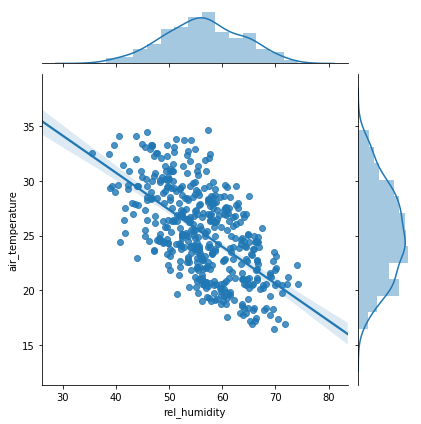

In [103]:
sns.jointplot(x='rel_humidity',y='air_temperature',data=dd_new,kind='regg')

The graph represents that air temperature and humidity have a negative relationship which can explain alot about seasoal patterns and how the affect the flying of a drone.

In [106]:
p = dd_new[['launch_groundspeed', 'launch_airspeed' ,'rel_humidity','air_temperature']]

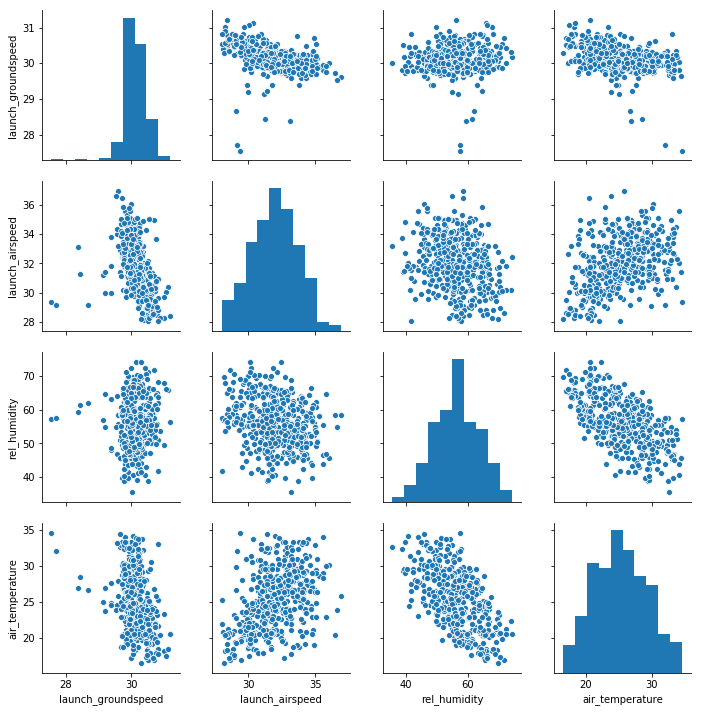

In [107]:
sns.pairplot(p)

launch airspeed depends on air temperature.
launch groundspeed remains constant.